    V Dataset 1. See README.txt for more details
    SEQ has two monitors. Mon 1 is just after Fermi chopper. Mon 2 is after the detectors.
    LM1 = 18.26
    mcvine neutron recorder at 19.9

# Prepare

In [1]:
cd /SNS/users/lj7/dv/sns-chops/resolution/SEQUOIA/

/SNS/users/lj7/dv/sns-chops/resolution/SEQUOIA


In [7]:
import os, sys

In [2]:
#Program to load Vanadium or empty Can powder files and perform a constant-Q cut along the middle Q to look at energy resolution and intensity.
import matplotlib.pyplot as plt
from mantid import plots
from mantid.simpleapi import Load, ConvertToMD, BinMD, ConvertUnits, Rebin
from matplotlib.colors import LogNorm
import numpy as np
import mantid.simpleapi as msa
from mantid import mtd

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from mcni.utils import conversion as C

In [4]:
%matplotlib notebook

In [5]:
instrument = 'SEQ'
IPTS = 21308
RunNumbers=range(145160, 145241+1)
print(RunNumbers)
rawdatadir = "/SNS/%s/IPTS-%s/nexus" % (instrument, IPTS)
autoreducedir="/SNS/%s/IPTS-%s/shared/autoreduce/" % (instrument, IPTS)

[145160, 145161, 145162, 145163, 145164, 145165, 145166, 145167, 145168, 145169, 145170, 145171, 145172, 145173, 145174, 145175, 145176, 145177, 145178, 145179, 145180, 145181, 145182, 145183, 145184, 145185, 145186, 145187, 145188, 145189, 145190, 145191, 145192, 145193, 145194, 145195, 145196, 145197, 145198, 145199, 145200, 145201, 145202, 145203, 145204, 145205, 145206, 145207, 145208, 145209, 145210, 145211, 145212, 145213, 145214, 145215, 145216, 145217, 145218, 145219, 145220, 145221, 145222, 145223, 145224, 145225, 145226, 145227, 145228, 145229, 145230, 145231, 145232, 145233, 145234, 145235, 145236, 145237, 145238, 145239, 145240, 145241]


# Load data

In [8]:
sys.path.insert(0, os.path.abspath('./PyChop/'))

In [9]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from '/SNS/users/lj7/dv/sns-chops/resolution/SEQUOIA/PyChop/Vdata2018.pyc'>

In [10]:
expdata_all = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_All.dat'))

reading data. please wait...
  done


In [12]:
expdata_all.vdata

,#,RunNumber,Energy,Ei,chopper_choice,Chopper1,Chopper2,Chopper3,Height,FWHM,Sigma,Q
0,0.0,145160.0,2.0,2.007042,0.0,120.0,120.0,30.0,0.017237,0.028500,0.012102,0.435053
1,0.0,145161.0,3.0,3.012412,0.0,120.0,120.0,30.0,0.052395,0.057236,0.024304,0.532929
2,0.0,145162.0,4.0,4.018304,0.0,120.0,120.0,30.0,0.071759,0.085992,0.036515,0.615455
3,0.0,145163.0,5.0,5.025767,0.0,120.0,120.0,30.0,0.056265,0.120618,0.051218,0.688221
4,0.0,145164.0,6.0,5.633073,0.0,120.0,120.0,30.0,0.110947,0.125054,0.053102,0.738567
5,0.0,145165.0,7.0,7.040614,0.0,120.0,120.0,30.0,0.106029,0.178832,0.075937,0.814475
6,0.0,145166.0,8.0,8.047864,0.0,120.0,120.0,30.0,0.112967,0.218902,0.092952,0.870758
7,0.0,145167.0,9.0,9.042775,0.0,120.0,180.0,30.0,0.121579,0.179047,0.076028,0.923233
8,0.0,145168.0,10.0,10.050701,0.0,120.0,180.0,30.0,0.126550,0.213075,0.090478,0.973267
9,0.0,145169.0,12.0,12.064796,0.0,120.0,180.0,30.0,0.146165,0.275077,0.116806,1.066267


monitor data

In [15]:
!head -n 10 V_Cali_MonitorInt_IPTS_21308.dat

1.451600000000000000e+05 1.747000000000000000e+03 3.895578400000000000e+07 7.729093017578125000e+02
1.451610000000000000e+05 6.156000000000000000e+03 3.735150000000000000e+05 7.738259887695312500e+02
1.451620000000000000e+05 9.677000000000000000e+03 5.456010000000000000e+05 7.997090454101562500e+02
1.451630000000000000e+05 1.067800000000000000e+04 4.735110000000000000e+05 7.808759155273437500e+02
1.451640000000000000e+05 1.876400000000000000e+04 8.348210000000000000e+05 7.756593017578125000e+02
1.451650000000000000e+05 2.234400000000000000e+04 9.664400000000000000e+05 7.761926269531250000e+02
1.451660000000000000e+05 2.578500000000000000e+04 1.153180000000000000e+06 7.752592773437500000e+02
1.451670000000000000e+05 2.170000000000000000e+04 1.058813000000000000e+06 7.976924438476562500e+02
1.451680000000000000e+05 2.397500000000000000e+04 1.190030000000000000e+06 7.746926269531250000e+02
1.451690000000000000e+05 3.044000000000000000e+04 1.624206000000000000e+06 7.751093139648437500e+02


In [16]:
mondata = np.loadtxt('./V_Cali_MonitorInt_IPTS_21308.dat')

In [18]:
mondata.shape

(82, 4)

Runnumber, Monitor intensity, totscatt, duration

In [19]:
runno, monInt, totscatt, duration = mondata.T

# Examine

<IPython.core.display.Javascript object>


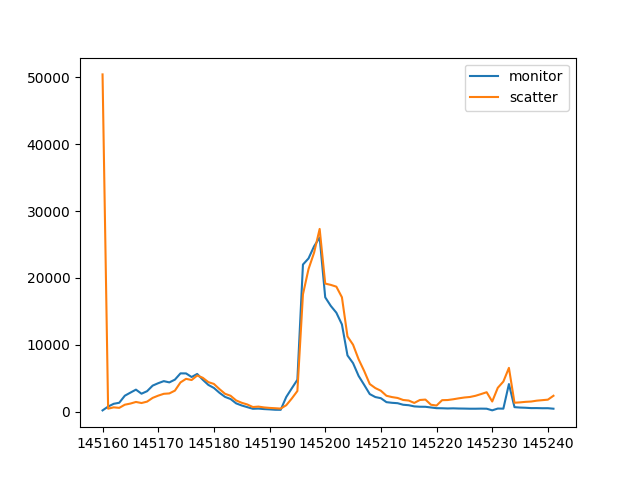

In [21]:
plt.figure()
plt.plot(runno, monInt/duration*100, label='monitor')
plt.plot(runno, totscatt/duration, label='scatter')
plt.legend()

# Consider monitor efficiency

According to SEQ paper, mon eff is 1×10−4 for 1  ̊A 

Make sure runnumber is sorted

In [25]:
np.all(runno[:-1] <= runno[1:])

True

In [29]:
len(runno)

82

Runnumber from the intensity-resolution dataset

In [27]:
runno1 = expdata_all.vdata.RunNumber

In [30]:
np.all(runno == runno1)

True

They are indexed the same

In [33]:
E = expdata_all.vdata.Ei

In [35]:
wavelen = 2*np.pi/C.e2k(E)

In [37]:
eff = 1e-4 * wavelen / 1.

<IPython.core.display.Javascript object>


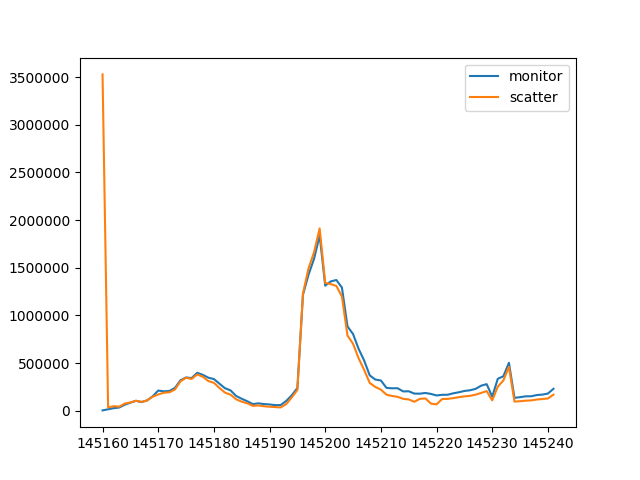

In [40]:
plt.figure()
plt.plot(runno, monInt/duration/eff, label='monitor')
plt.plot(runno, totscatt/duration*70, label='scatter')
plt.legend()

    This value would be neutrons per second at the monitor
    Needs neutrons per second per MW per cm^2
    The beam at sample is about 5cm X 5cm.
    The power was about 1.4 MW.
    So another factor of 1/25/1.4

<IPython.core.display.Javascript object>


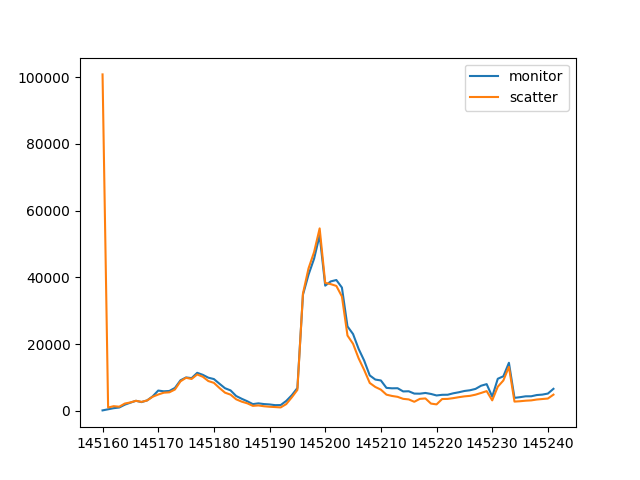

In [43]:
plt.figure()
plt.plot(runno, monInt/duration/eff/25/1.4, label='monitor')
plt.plot(runno, totscatt/duration*70/25/1.4, label='scatter')
plt.legend()

<IPython.core.display.Javascript object>


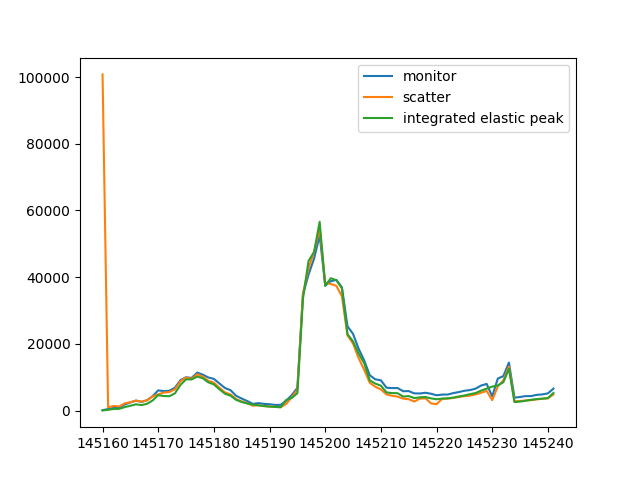

In [53]:
plt.figure()
plt.plot(runno, monInt/duration/eff/25/1.4, label='monitor')
plt.plot(runno, totscatt/duration*70/25/1.4, label='scatter')
plt.plot(runno, expdata_all.intensity*70570, label='integrated elastic peak')
plt.legend()

In [51]:
np.median(totscatt/duration*70/25/1.4/expdata_all.intensity)

70569.13044025202

So 70570 is the scale factor

**This seems wrong. Too low compared to ARCS.  One obvious difference is that in ARCS the monitor efficiency is said to be 1e-5 at 1.8 angstrom. It is smaller than the efficiency we used for SEQ above.**

# from V scattering

Here we try to work from V scattering

* vanadium data scale factor

  - The measurement is counts/second for 3X3 cm^2 sample cross section.
  - scattering percentage
    * V scattering cross section: 5.1barn
    * V lattice constants 3.03
  - detector efficiency
  - detector coverage 2.5/4/np.pi

In [59]:
def calc_deteff(He_press = 10., He_T = 300., width = 0.0254*.8, E=100):
    "He_press: atm; He_T: K; width: meter; E: meV"
    pressure = He_press * 101325
    mu = 5333.0e-28/1.798 * np.sqrt(81.81/E) * pressure/He_T * 300*2.414e20
    l = 1./mu
    return 1-np.exp(-width/l)

In [61]:
deteff = calc_deteff(He_press = 10., He_T = 300., width = 0.0254*.8, E=E)

In [54]:
scatt_length = 3.03**3 * 1e-30 / 2 / 5.1e-28
thickness = 0.001*2  # is this correct? ask Matt
scatt_percentage = 1-np.exp(-thickness/scatt_length)
print scatt_percentage

0.07070911957071369


In [84]:
vscatt_scale = 1. /9. / scatt_percentage  * (4*np.pi/0.86) / 1.4

In [85]:
vscatt_scale

16.40081530739043

<IPython.core.display.Javascript object>


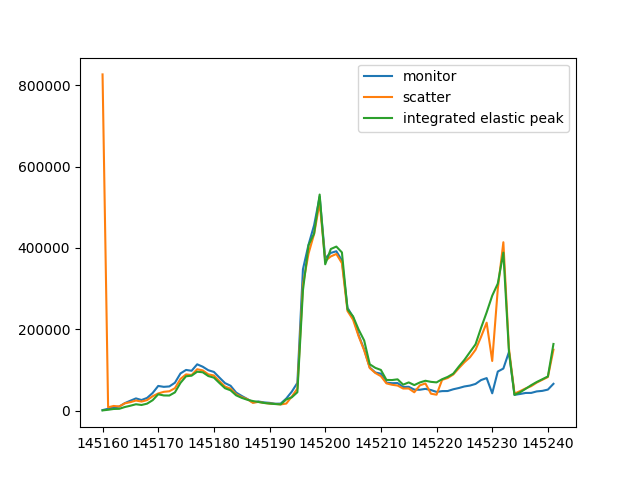

In [74]:
plt.figure()
plt.plot(runno, monInt/duration/eff/25/1.4*10, label='monitor')
plt.plot(runno, totscatt/duration/deteff*vscatt_scale, label='scatter')
plt.plot(runno, expdata_all.intensity/deteff*580000, label='integrated elastic peak')
plt.legend()

# ARCS scaling factor

## Scale factor for elastic peak integration

This was used in https://jupyter.sns.gov/user/lj7/notebooks/dv/sns-chops/resolution/ARCS/resolution-plot-dropdown-data_v2-for-arcs-pages-resolution-site.ipynb

In [83]:
arcs_vscatt_scale = 2.6e4
arcs_vscatt_scale *=60./1.4
arcs_vscatt_scale *= 1.5/2
print arcs_vscatt_scale

835714.285714


# Compare v scatter total int and elastic peak integration

<IPython.core.display.Javascript object>


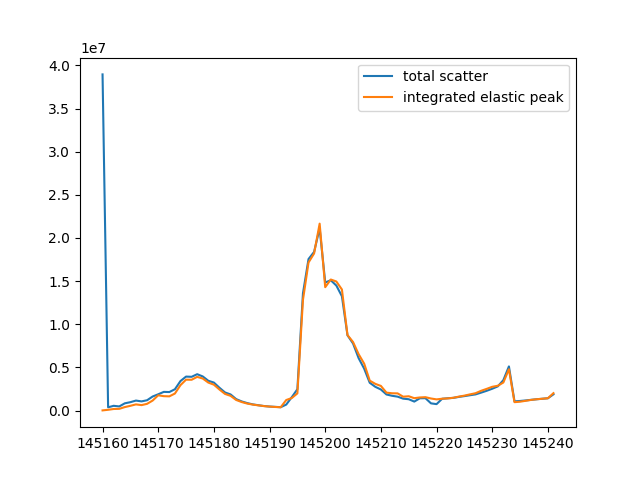

In [86]:
plt.figure()
plt.plot(runno, totscatt, label='total scatter')
plt.plot(runno, expdata_all.intensity*2.7e7, label='integrated elastic peak')
plt.legend()